##Import Libraries and Load Dataset

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, LeakyReLU
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

# load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}, y_test shape: {y_test.shape}")

x_train shape: (60000, 28, 28), y_train shape: (60000,)
x_test shape: (10000, 28, 28), y_test shape: (10000,)


In [ ]:
# count samples per class in training set
unique, counts = np.unique(y_train, return_counts=True)

print("Training set class distribution:")
for u, c in zip(unique, counts):
    print(f"Digit {u}: {c} samples")

# check if any missing values
print("\nMissing values in x_train:", np.isnan(x_train).sum())
print("Missing values in y_train:", np.isnan(y_train).sum())
print("Missing values in x_test:", np.isnan(x_test).sum())
print("Missing values in y_test:", np.isnan(y_test).sum())

Training set class distribution:
Digit 0: 5923 samples
Digit 1: 6742 samples
Digit 2: 5958 samples
Digit 3: 6131 samples
Digit 4: 5842 samples
Digit 5: 5421 samples
Digit 6: 5918 samples
Digit 7: 6265 samples
Digit 8: 5851 samples
Digit 9: 5949 samples

Missing values in x_train: 0
Missing values in y_train: 0
Missing values in x_test: 0
Missing values in y_test: 0


In [ ]:
# quick summary of inputs
print("x_train min/max:", x_train.min(), "/", x_train.max())
print("x_test min/max:", x_test.min(), "/", x_test.max())
print("y_train unique labels:", np.unique(y_train))
print("y_test unique labels:", np.unique(y_test))

x_train min/max: 0 / 255
x_test min/max: 0 / 255
y_train unique labels: [0 1 2 3 4 5 6 7 8 9]
y_test unique labels: [0 1 2 3 4 5 6 7 8 9]


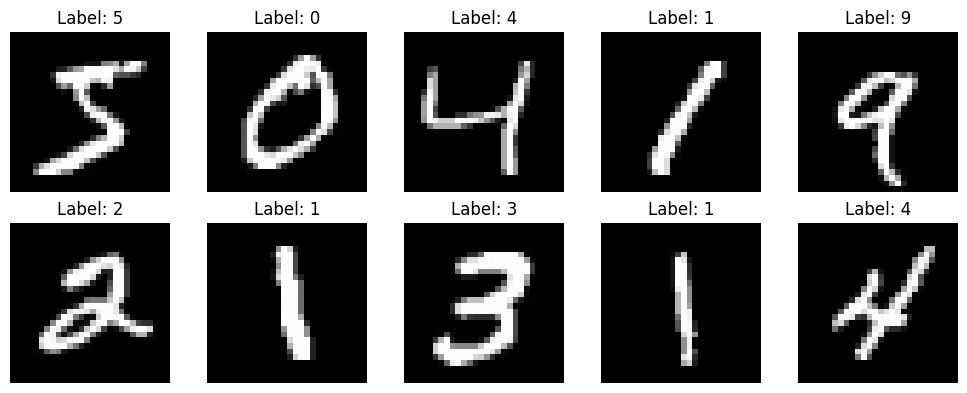

In [ ]:
plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

#Data Preprocessing

In [ ]:
# normalize pixel values to range [0, 1]
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

# flatten images for Dense network (28x28 to 784)
x_train_flat = x_train.reshape(-1, 28*28)
x_test_flat = x_test.reshape(-1, 28*28)

# one-hot encode labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

#Build the Model

In [ ]:
model = Sequential([
    # input + 1st hidden layer
    Dense(512, input_shape=(784,)),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),
    Dropout(0.3),

    # 2nd hidden layer
    Dense(256),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),
    Dropout(0.3),

    # 3rd hidden layer
    Dense(128),
    BatchNormalization(),
    LeakyReLU(alpha=0.01),

    # output layer
    Dense(10, activation='softmax')
])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_55 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_41          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_38 (LeakyReLU)      │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_42          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_39 (LeakyReLU)      │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_43          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_40 (LeakyReLU)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 571,018 (2.18 MB)

 Trainable params: 569,226 (2.17 MB)

 Non-trainable params: 1,792 (7.00 KB)

#Compile and Train

In [ ]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    x_train_flat, y_train_cat,
    validation_split=0.2,
    epochs=20,
    batch_size=128,
    verbose=1
)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.8299 - loss: 0.5687 - val_accuracy: 0.9574 - val_loss: 0.1363
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9531 - loss: 0.1511 - val_accuracy: 0.9720 - val_loss: 0.0972
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9651 - loss: 0.1075 - val_accuracy: 0.9746 - val_loss: 0.0848
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9716 - loss: 0.0905 - val_accuracy: 0.9752 - val_loss: 0.0851
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9783 - loss: 0.0702 - val_accuracy: 0.9781 - val_loss: 0.0782
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9780 - loss: 0.0670 - val_accuracy: 0.9771 - val_loss: 0.0761
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9816 - loss: 0.0570 - val_accuracy: 0.9789 - val_loss: 0.0735
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9845 - loss: 0.0473 - val_accurac

#Visualization

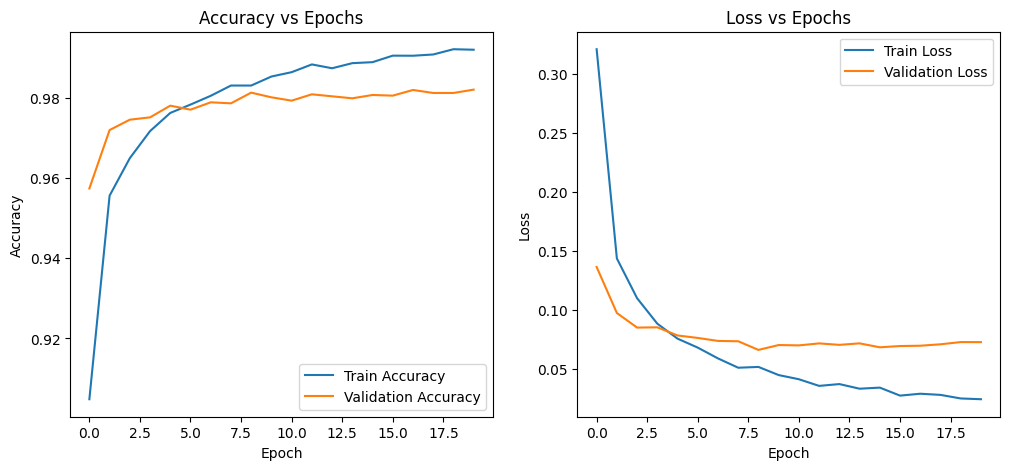

In [ ]:
# plot accuracy
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# plot loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

#Evaluate on Test Set

In [ ]:
# test accuracy and loss
test_loss, test_acc = model.evaluate(x_test_flat, y_test_cat, verbose=0)
print(f"Test Accuracy: {test_acc*100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

# predict first 10 digits
predictions = np.argmax(model.predict(x_test_flat[:10]), axis=1)
print("Predicted digits:", predictions)
print("Actual digits:   ", y_test[:10])

Test Accuracy: 98.42%
Test Loss: 0.0554
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Predicted digits: [7 2 1 0 4 1 4 9 5 9]
Actual digits:    [7 2 1 0 4 1 4 9 5 9]


Test Accuracy: 98.42%
Test Loss: 0.0554
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Classification Metrics:
Accuracy : 98.42%
Precision: 98.42%
Recall   : 98.40%
F1-score : 98.41% 



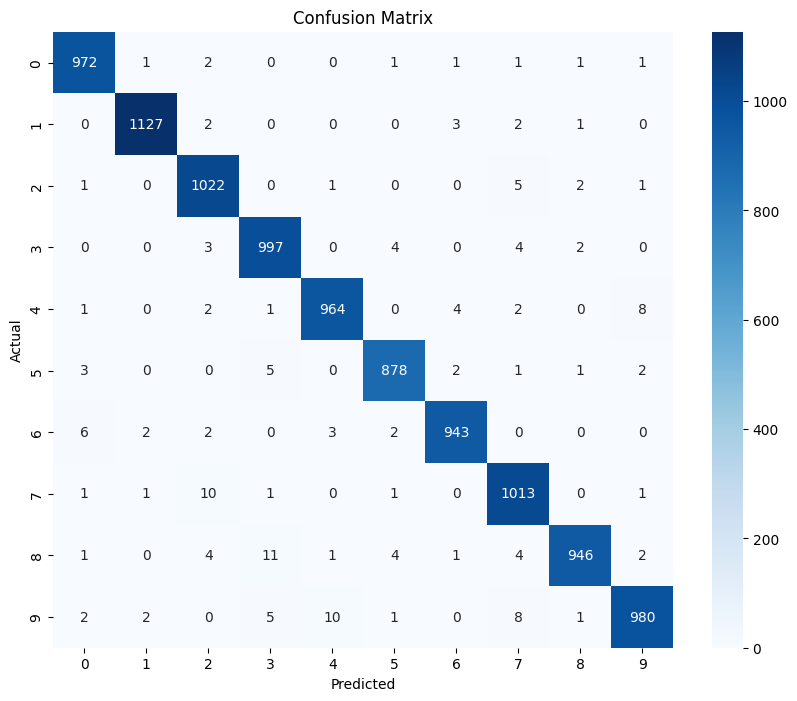

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# evaluate test loss and accuracy
test_loss, test_acc = model.evaluate(x_test_flat, y_test_cat, verbose=0)
print(f"Test Accuracy: {test_acc*100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

# predict all test digits
y_pred_prob = model.predict(x_test_flat)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = y_test

# Accuracy, Precision, Recall, F1-score
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

print("\nClassification Metrics:")
print(f"Accuracy : {accuracy*100:.2f}%")
print(f"Precision: {precision*100:.2f}%")
print(f"Recall   : {recall*100:.2f}%")
print(f"F1-score : {f1*100:.2f}% \n")

# confusion matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


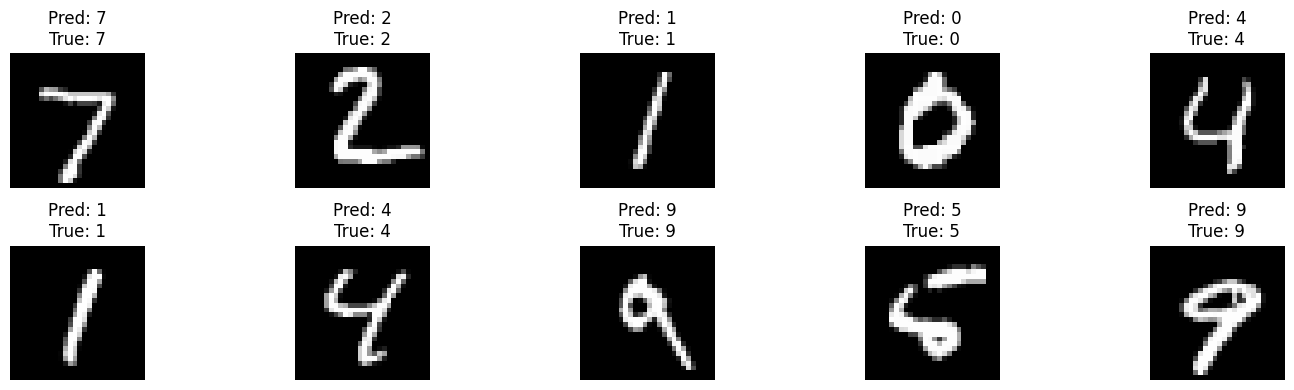

In [ ]:
# select first 10 test images
num_images = 10
images = x_test[:num_images]
true_labels = y_test[:num_images]
pred_labels = np.argmax(model.predict(x_test_flat[:num_images]), axis=1)

# plot images with predictions
plt.figure(figsize=(15,4))
for i in range(num_images):
    plt.subplot(2, 5, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(f"Pred: {pred_labels[i]}\nTrue: {true_labels[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()
